# Reality Capture & Precision 3D Scanning: Introduction to OpenCV in python
#### David Griffiths &nbsp;&nbsp;&nbsp; david.griffiths.16@ucl.ac.uk

## Basic OpenCV functions

##### Import necessary libraries

In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
import pylab as plt

##### Load image

In [3]:
file = 'images/aerial_small.tif'

# Load image in BGR colorspace
img_color = cv2.imread(file, 1)
#Load image in grayscale
img_gray = cv2.imread(file, 0)
# Convert BGR to RGB
img_color_RGB = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

To plot the images we can create a small helper function. Here we take a list of images, their respective titles, the size of the figure and the subplot shape as input arguments.

In [4]:
def plot_images(images, titles, figsize, shape, ticks=False):
    ''' Image plotter helper function.
        
        parameters:
            images  : list
            titles  : titles
            figsize : tuple
            shape   : tuple
                      rows x cols
            ticks   : Bool
                      Set True to show axis ticks
        returns:
            None
    '''
    plt.figure(figsize=figsize)
    
    for i in range(len(images)):
        plt.subplot(shape[0],shape[1],i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        if ticks == False:
            plt.xticks([]),plt.yticks([])
    plt.show()
    
    return None

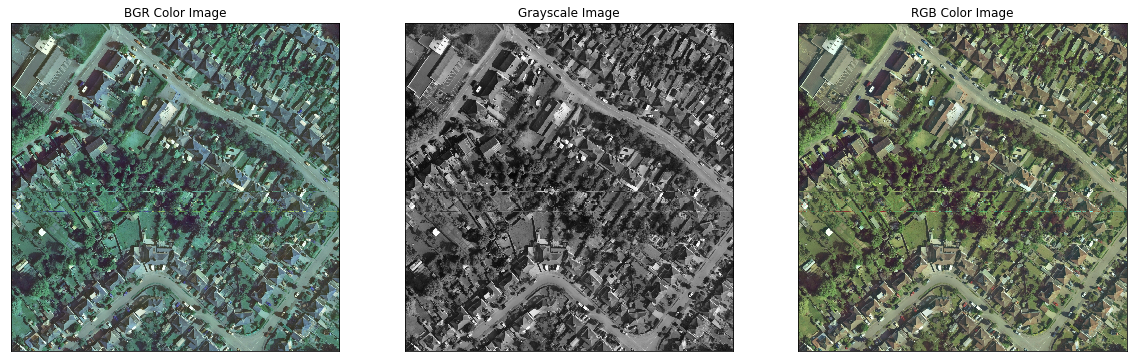

In [5]:
# Plot images using helper function
plot_images([img_color, img_gray, img_color_RGB], 
            ['BGR Color Image', 'Grayscale Image', 'RGB Color Image'], 
            (20,20),
            (1, 3))

##### Read and edit pixels

OpenCV images are stored in the form of numpy arrays. The numpy array has the dimensions (image height x image width x number of channels). The images can therefore be treated as standard numpy $n$ dimension arrays.

In [6]:
print ('One channel grayscale image: ', img_gray.shape)
print ('3 Chanel BGR colorspace image: ', img_color.shape)

One channel grayscale image:  (1000, 1000)
3 Chanel BGR colorspace image:  (1000, 1000, 3)


To access a specific pixel value basic numpy array indexing can be used. For example, to return the intensity of pixel x=500, y= 1000 you can use:

In [7]:
pixel = 500, 750

print (img_gray[pixel])
print (img_color[pixel])

54
[50 58 48]


Notice how the colour image has 3 channels and therefore three pixel intensities (Blue (0), Green (1), Red (2)). Further indexing can reutrn a specific intensity i.e:

In [8]:
blue = img_color[pixel][0]
green = img_color[pixel][1]
red = img_color[pixel][2]
print (blue, green, red)

50 58 48


**Task**: How would we create a simple 'for' loop to loop through every pixel in a given image?

In [9]:
# Try task here

**Extra**: How could we use numpy indexing to remove the need for a 'for' loop?

In [10]:
# Try task here

## Geometric Transformations

When carrying out geometric transformations of an image it is important to think of the image as a standard matrix. This way typical linear algebra can be used to perform transformations.

##### Scaling

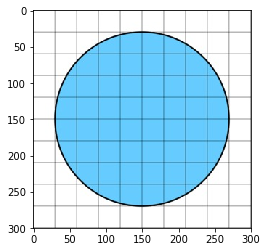

In [11]:
# First we will import a new image which which will allow us to easily see the result of the transformations.

img = cv2.imread('images/circle.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [12]:
# OpenCV offers a resize function which can be called using cv2.resize. 
# We will go through a few ways to use this function.

rows, cols, channels = img.shape

# Stretch collumns by a factor of 2
img_resize = cv2.resize(img, (cols*2, rows), interpolation = cv2.INTER_CUBIC)

# Notice the interpolation method here. OpenCV offers multiple interpolation functions.
# In general it is reccommended:
# Shrinking: cv2.INTER_AREA
# Zooming: cv2.INTER_CUBIC (slow) or cv2.INTER_LINEAR
# Default (general): cv2.INTER_LINEAR

# Half the size of the image
img_resize = cv2.resize(img, (int(cols/2), int(rows/2)), interpolation = cv2.INTER_AREA)

# Set to specified size
img_resize = cv2.resize(img, (180, 120),interpolation = cv2.INTER_LINEAR)

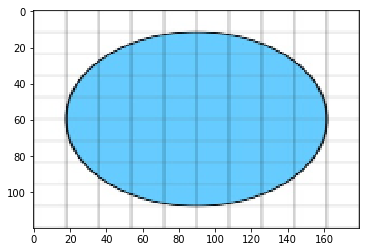

In [13]:
plt.imshow(img_resize)

##### Translation

OpenCV provides a function (`cv2.warpAffine`) to carry out affine transformations. The main requirements for this are the original image you wish to apply the transformation and the transformation matrix $M$. We must therefore first compute the transformation matrix $M$. If you know the shift in ($x$, $y$) that you wish to compute you can let:  

$M= \begin{bmatrix} 1 & 0 & ∆x \\ 0 & 1 & ∆y \end{bmatrix}$

In [14]:
M = np.float32([[1,0,25],[0,1,50]])
translation = cv2.warpAffine(img, M, (cols, rows))

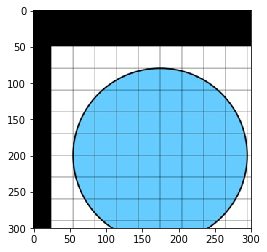

In [15]:
plt.imshow(translation)

Similarly a rotation matrix can be computed using an $M$ matrix following:

$M= \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix}$

OpenCV provides a tool for creating these matrix with the function `cv2.getRotationMatrix2D`

M matrix 
 [[  0.90630779   0.42261826 -49.33890732]
 [ -0.42261826   0.90630779  77.44657121]] 


M offset matrix 
 [[  0.90630779   0.42261826 -82.23151219]
 [ -0.42261826   0.90630779 129.07761868]]


(<matplotlib.axes._subplots.AxesSubplot at 0x127e99320>,
 <matplotlib.image.AxesImage at 0x127f39f60>)

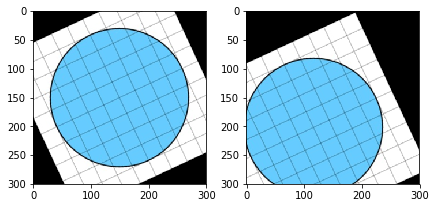

In [16]:
# Create rotation matrix for 25 degrees rotation in respect to the image center
M = cv2.getRotationMatrix2D((cols/2, rows/2), 25, 1)

# Create rotation matrix for 25 degrees rotation with different roation center
M_offset = cv2.getRotationMatrix2D((250, 250), 25, 1)

transformation = cv2.warpAffine(img, M, (cols, rows))
transformation_offset = cv2.warpAffine(img, M_offset, (cols, rows))

print ('M matrix \n', M, '\n\n')
print ('M offset matrix \n', M_offset)

plt.figure(figsize=(7,7))
plt.subplot(221), plt.imshow(transformation)
plt.subplot(222), plt.imshow(transformation_offset)

##### Affine transformation

In affine transformations all parallel lines will remain parallel after the transformation. OpenCV provides a function `cv2.getAffineTransformation` to determine the transformation matrix. The minimum number of points for an affine transformation is 3. To determine the $M$ matrix we must therefore make 2 3x1 matrix with the first containing the original co-ordinates of the points, the second will contain the location of the points after the transformation.

(<matplotlib.axes._subplots.AxesSubplot at 0x12807f2e8>,
 <matplotlib.image.AxesImage at 0x12815c7f0>)

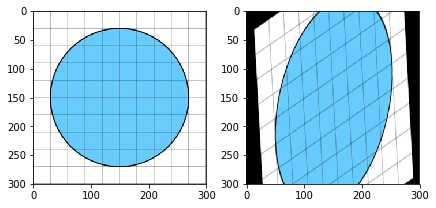

In [17]:
originalPts = np.float32([[50, 50], [100, 150], [180, 120]])
transformedPts = np.float32([[60, 75],[110, 190], [175, 100]])

# Determine M matrix
M = cv2.getAffineTransform(originalPts, transformedPts)

# Pass image and M matrix in cv2.warpAffine function
transformation = cv2.warpAffine(img, M, (cols, rows))

plt.figure(figsize=(7,7))
plt.subplot(221), plt.imshow(img)
plt.subplot(222), plt.imshow(transformation)

##### Perspective transformation

Perspective transformation is similar to affine however instead of preserving parallel lines it preserves collinearity and incidence. As perspective offers an extra degree of translation 4 points are required to determine the $M$ matrix. By providing the co-ordinates in the same manner as the affine transformation, the matrix can be computed using the function `cv2.getPerspectiveTransform`. The transormation can then be carried out using `cv2.warpPerspective`.

(<matplotlib.axes._subplots.AxesSubplot at 0x12823b6d8>,
 <matplotlib.image.AxesImage at 0x1282f0518>)

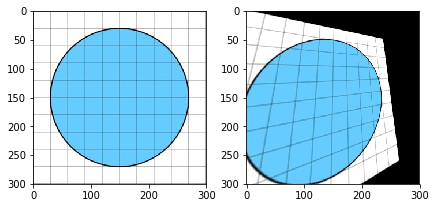

In [18]:
originalPts = np.float32([[50, 50], [100, 150], [180, 120], [30, 30]])
transformedPts = np.float32([[50, 53], [98, 155], [175, 120], [27, 31]])

# Determine M matrix
M = cv2.getPerspectiveTransform(originalPts, transformedPts)

# Pass image and M matrix in cv2.warpAffine function
transformation = cv2.warpPerspective(img, M, (cols, rows))

plt.figure(figsize=(7,7))
plt.subplot(221), plt.imshow(img)
plt.subplot(222), plt.imshow(transformation)

## Image Thresholding

Basic thresholding in OpenCV is achieved through the `cv2.threshold` function. There are multiple options to determine how the threshold can be computed, but first we will create a simple binary threshold. 

**TASK:** Using the code we created earlier how could this be adapted into a simple binary classifier for a grayscale image with a critical value of 150?

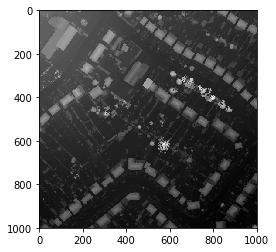

In [19]:
# First lets load and display a digital elevation model (DEM)
img = cv2.imread('images/lidar_small.tif', 0)
plt.imshow(img, 'gray')

In [20]:
# Try task here

We will now carry this out using OpenCV. The function cv2.THRESH_BINARY defines the threshold style. The availble styles are:

`cv2.THRESH_BINARY`

`cv2.THRESH_BINARY_INV`

`cv2.THRESH_TRUNC`

`cv2.THRESH_TOZERO`

`cv2.THRESH_TOZERO_INV`

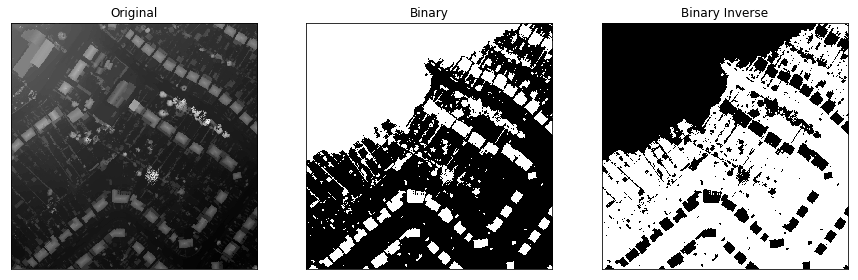

In [21]:
ret, thresh = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
ret, thresh_inv = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY_INV)

plot_images([img, thresh, thresh_inv],
            ['Original', 'Binary', 'Binary Inverse'],
            (15,15),
            (1, 3))

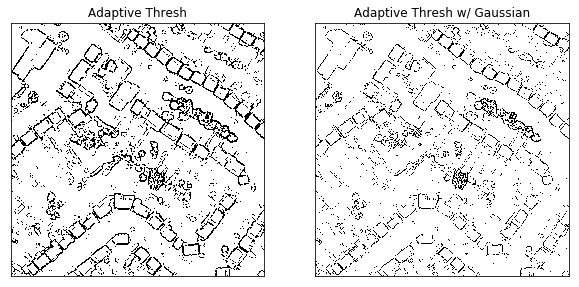

In [22]:
adaptive_thresh = cv2.adaptiveThreshold(img,255, \
                            cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,15,7)

adaptive_thresh_g = cv2.adaptiveThreshold(img,255, \
                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,7)

plot_images([adaptive_thresh, adaptive_thresh_g],
            ['Adaptive Thresh', 'Adaptive Thresh w/ Gaussian'],
            (10,10),
            (1, 2))

##### Otsu's Binarisation

Otsu's binirisation is a method to automatically determine the threshold for a bimodal image. This attempts to find the optimum threshold value by converting the image to a histogram and finding the value in between the two main peaks. This method is therefore only suitable for bimodal images.

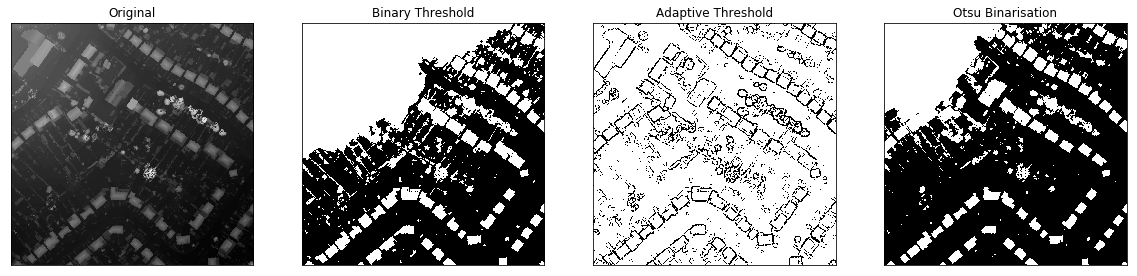

In [23]:
ret, otsu = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plot_images([img, thresh, adaptive_thresh, otsu],
            ['Original', 'Binary Threshold', 'Adaptive Threshold', 'Otsu Binarisation'],
            (20, 20),
            (1, 4))


## Convolution Filters

Convolutional filters processes images by passing a matrix (kernel) over each pixel within an image. The dot product of the weighted kernel matrix and the overlaying pixels of the image is used to create a new pixel value at the given point. Each pass is often referred to as a convolution.  This can be used for common image processing such as blurring, sharpening and edge detection. OpenCV provides many pre-built functions for kernels convolutions as well as the `cv2.filter2D()` function which can be used to pass a custom-made filter over an image.

### Bluring

Bluring (or smoothing) is typically used in image processing for noise reduction and smoothing. Here we achieve this by convolving a low-pass filter kerel over an image.

##### Basic Blurring

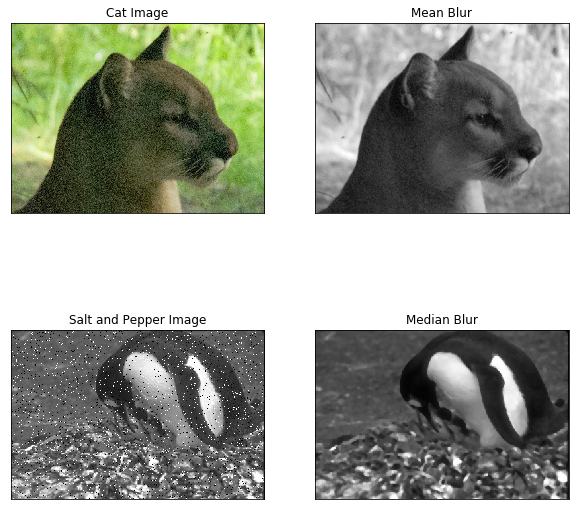

In [24]:
img = cv2.imread('images/noise.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gs = cv2.imread('images/noise.jpg', 0)

# A simple averaging filter could be made by passing first creating a kerel
kernel = np.ones((5,5), np.float32)/25
# Using the filter2D function the image can be averaged
averaged_img = cv2.filter2D(img, -1, kernel)

#Alternatively we can use a pre-made OpenCV blur
mean_blur = cv2.blur(img_gs,(5,5))

#Median blurs are good for removing salt and pepper effects

img_sp = cv2.imread('images/salt.jpg', 0)

median_blur = cv2.medianBlur(img_sp, 5)

plot_images([img, mean_blur, img_sp, median_blur],
            ['Cat Image', 'Mean Blur', 'Salt and Pepper Image', 'Median Blur'],
            (10, 10),
            (2, 2))

##### Gaussian Blurring

The gaussian blur uses the gaussian function to calculate each pixels transformation. The equation used to define the Guassian function in 2-dimensions ($x$ and $y$) is defined as: $G_{(x)} = \frac{1}{\sqrt{2\Pi\sigma^2}}e^{-\frac{x^2}{2\sigma^2}}$. 

The resulting 3x3 kernel used is: $G~(x,y)= \begin{bmatrix} 1 & 2 & 1 \\ 2 & 4 & 2 \\ 1 & 2 & 1 \end{bmatrix} * \frac{1}{16}$

As blurring filters smooth areas with a high variance of intensity they have a strong response to edges. This results in the smoothing of an edge. If our image processing problem is concerned with the edges this is not ideal. Bilateral filters preserve edges by considering the neighbouring pixels and weights assainged to them. The weights have two components, the first is the same weighting as used in the Gaussian kernel above. The second takes into account the difference in intensity between the neighbouring pixels and the evaluated one. A more detailed description of this can be [found here](http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html).

If we are primarilly looking at denoising, OpenCV offers more specialised features for such tasks. Take a look at `cv2.fastNlMeansDenoising()` and `cv2.fastNlMeansDenoisingColored()` if you are dealing with images that contain a lot of noise.

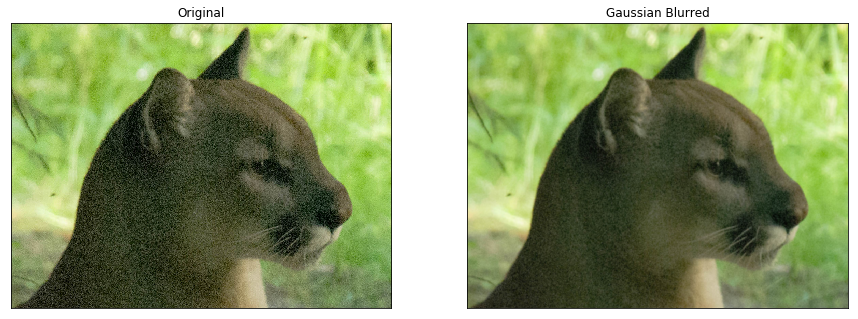

In [25]:
gaus_blur = cv2.GaussianBlur(img, (7, 7), 0)

plot_images([img, gaus_blur],
            ['Original', 'Gaussian Blurred'],
            (15, 15),
            (1, 2))

### Edge Detection and Image Gradients

Edge detection is one of the most fundamental operations used in image processing. Edge detection can be used for feature extraction/segmentation as well as limiting operations to pixels with geometric interest. Here we will look at some of the most common edge detectors discussed in this module.

##### Sobel Operator 

The sobel operator is a kernal convolution that is used to find edges within an image. The sobel operator is a discrete differentiation operator which computes an approximation to the derivative of an image that is serperate in the x and y direction. This therefore responds strongly to areas where there is a high variation of pixel intensities. By default this is achieved by passing the following 3x3 kernels over a given image:

$G~x= \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}$ &nbsp;&nbsp;&nbsp; $G~y= \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}$

Using the kernel size argument '`ksize`' the size of the kernel can be increased. If `ksize=-1` the Sharr derivative is used instead of the sobel. When using a 3x3 kernel size OpenCV reccommends using the Sharr kernal which is as follows:

$G~x= \begin{bmatrix} -3 & 0 & 3 \\ -10 & 0 & 10 \\ -3 & 0 & 3 \end{bmatrix}$ &nbsp;&nbsp;&nbsp; $G~y= \begin{bmatrix} -3 & -10 & -3 \\ 0 & 0 & 0 \\ 3 & 10 & 3 \end{bmatrix}$

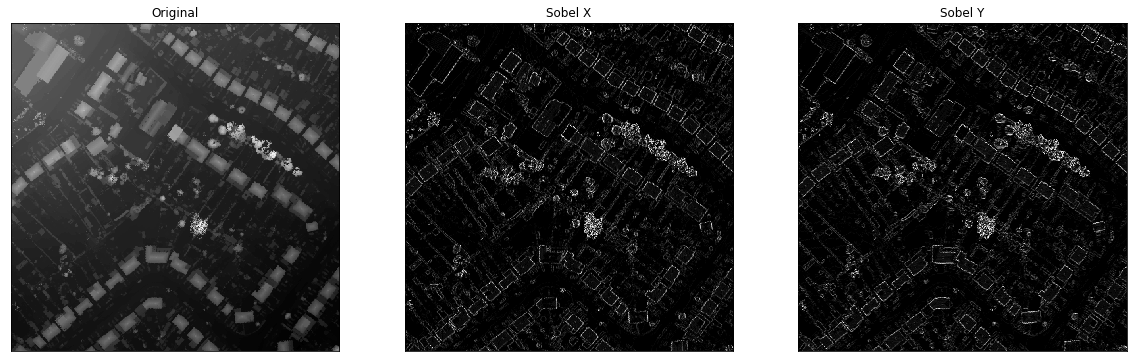

In [26]:
file = 'images/lidar_small.tif'
img = cv2.imread(file, 0)

sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
abs_sobel64f = np.absolute(sobelx64f)
sobelx_8u = np.uint8(abs_sobel64f)

sobely64f = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
abs_sobel64f = np.absolute(sobely64f)
sobely_8u = np.uint8(abs_sobel64f)

plot_images([img, sobelx_8u, sobely_8u],
            ['Original', 'Sobel X', 'Sobel Y'],
            (20, 20),
            (1, 3))

Whilst the sobel is useful for finding edges in the $x$ and $y$ directions independently, rarely would we use these as our final output. It would be more common to combine the two images which contains all edges. The below function shows us how given an image as input we can return an edge magnitude image for both $x$ any $y$ directions.

In [27]:
def getGradientMagnitude(im):
    ddepth = cv2.CV_32F
    dx = cv2.Sobel(im, ddepth, 1, 0)
    dy = cv2.Sobel(im, ddepth, 0, 1)
    dxabs = cv2.convertScaleAbs(dx)
    dyabs = cv2.convertScaleAbs(dy)
    mag = cv2.addWeighted(dxabs, 0.5, dyabs, 0.5, 0)
    return mag

In [28]:
# OpenCV offer a function to return the kernel coefficients

sobel7x_deriv = cv2.getDerivKernels(1, 0, 5)
sobel7y_deriv = cv2.getDerivKernels(0, 1, 5)

# To display this we need to compute the outer product of the two vectors

print ('Sobel 7x7 kernel x direction:\n', np.outer(sobel7x_deriv[1], sobel7x_deriv[0]))
print ('\nSobel 7x7 kernel y direction:\n', np.outer(sobel7y_deriv[1], sobel7y_deriv[0]))

Sobel 7x7 kernel x direction:
 [[ -1.  -2.   0.   2.   1.]
 [ -4.  -8.   0.   8.   4.]
 [ -6. -12.   0.  12.   6.]
 [ -4.  -8.   0.   8.   4.]
 [ -1.  -2.   0.   2.   1.]]

Sobel 7x7 kernel y direction:
 [[ -1.  -4.  -6.  -4.  -1.]
 [ -2.  -8. -12.  -8.  -2.]
 [  0.   0.   0.   0.   0.]
 [  2.   8.  12.   8.   2.]
 [  1.   4.   6.   4.   1.]]


##### Laplacian Edge Detector

The laplacian edge detector computes the residual of an image using the equation, $\frac{\partial^2src}{\partial x^2} + \frac{\partial^2src}{\partial y^2}$ where the derivatives for $x$ and $y$ are found using sobel in the $x$ and $y$ direction respectively. Due to this relationship when we call `cv2.Laplacian` the sobel operator is run internally. When the kernel size `ksize=1` the following filter is applied.

$G= \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix}$

Alternatively we could also adapt this to consider diagonals using the following:

$G~x= \begin{bmatrix} 1 & 1 & 1 \\ 1 & -8 & 1 \\ 1 & 1 & 1 \end{bmatrix}$

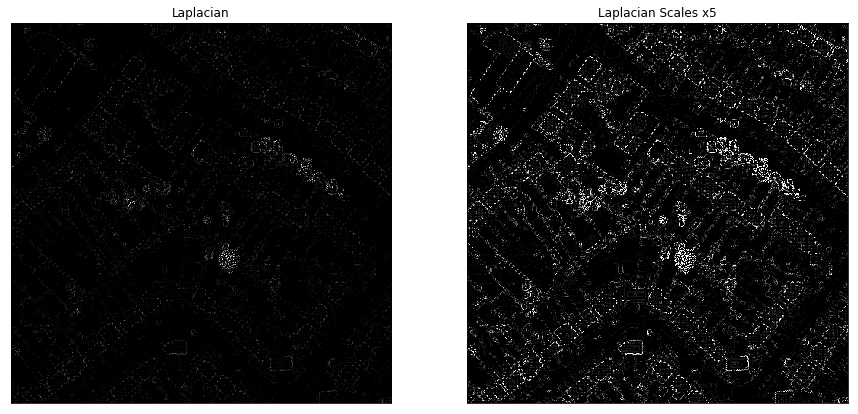

In [29]:
# Scaling can be used to scale the returned pixel intensity

laplacian = cv2.Laplacian(img, cv2.CV_8U, ksize=1, scale=1) 
abs_lap64f = np.absolute(laplacian)
lap_8u = np.uint8(abs_lap64f)

laplacian_s5 = cv2.Laplacian(img, cv2.CV_8U, ksize=1, scale=5)
abs_lap64f_s5 = np.absolute(laplacian_s5)
lap_8u_s5 = np.uint8(abs_lap64f_s5)

plot_images([lap_8u, lap_8u_s5],
            ['Laplacian', 'Laplacian Scales x5'],
            (15, 15),
            (1, 2))

##### Canny Edge Detector

Developed by John F. Canny in 1986, the canny edge detection algorithms extracts edges using a 5 stage approach:

* Noise removal and smoothing using Gaussian filter
* Gradient intensity representations for the image computed (Sobel)
* Apply non-maximum suppression to remove false edges
* Thresholding by applying an upper and lower boundary on the gradient values
* Hysteresis thresholding to track along connected edges

In OpenCV all of these steps are wrapped into 1 function `cv2.Canny()`. The function takes 4 main arguments:

* Lower threshold for hysteresis thresholding (Double)
* Upper threshold for hysteresis thresholding (Double)
* Kernel size for sobel operator (Int)
* Whether or not to use $L_{2}$ norm for image gradient instead of the default $L_{1}$ (Bool)

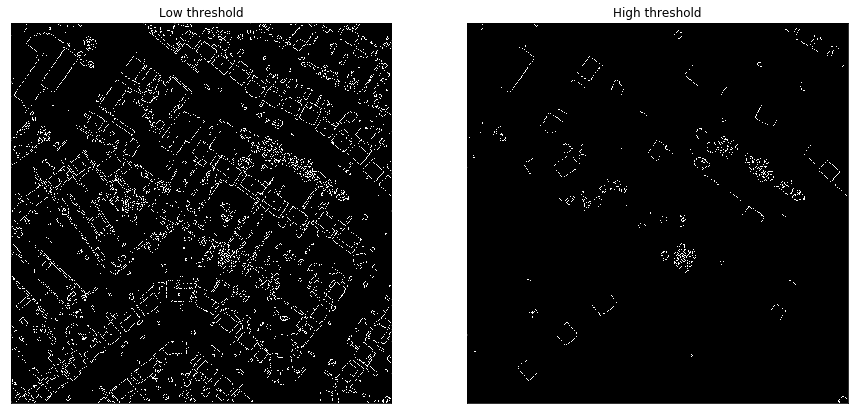

In [30]:
canny_lowthresh = cv2.Canny(img, 25,75,5,L2gradient=True)
canny_highthresh = cv2.Canny(img,100,250,5,L2gradient=True)

plot_images([canny_lowthresh, canny_highthresh],
            ['Low threshold', 'High threshold'],
            (15, 15),
            (1, 2))

### Morphological Filters

The last topic we will look at is morphological transformations. As the name suggests we are going to make physical changes to the shape of images. This is usually performed on binary images although it is possible to carry this out on RGB images if appropriate measures are taken. The most common forms of morphological transformations are:

* Dilation
* Erosion
* Opening
* Closing

However, OpenCV offers support for a larger number of transformations. Also, take a look at [scikit-image](http://scikit-image.org) where you can find many unique and novel transformations. Here we will cover the use of the erosion filter to remove non-terrain objects (i.e. buildings, vegetation, cars etc.) from Digital Surface Models (DSMs) to generate Digital Terrain Models (DTMs). A good introduction to all the filters mentioned above can be found [here](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html).

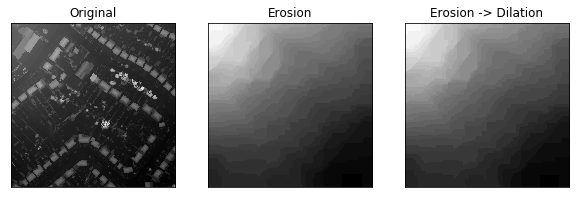

In [63]:
file = 'images/lidar_small.tif'
img = cv2.imread(file, 0)

# Define our erosion kernel
kernel = np.ones((7,7),np.uint8)

# Perform erosion
erosion = cv2.erode(img,kernel,iterations = 15)

# Smooth resulting DTM with a Gaussian Blur
erosion_g = cv2.GaussianBlur(erosion, (7, 7), 1)

# Alternatively we could using the dilation operator on the eroded
# image to remove any small remaining above ground artifacts. This
# is very similar to the 'Opening' operator

dilation = cv2.dilate(erosion,kernel,iterations = 1)

plot_images([img, erosion_g, dilation], 
            ['Original', 'Erosion', 'Erosion -> Dilation'], 
            (10,10), 
            (1, 3))

Once we have a satisfactory DTM we can then use this to remove the terrain from the image returning only the above ground objects. We can achieve this by using the `cv2.subtract()` or `cv2.absdiff()` functions. As the difference will never be perfect (i.e. all - ground = above) we are usually left will a very small value for the ground. To remove this we can either perform a manual threshold, or alternatively, use an otsu binarisation. Otsu is a good model here as the image will likely be bimodal (ground and above ground).

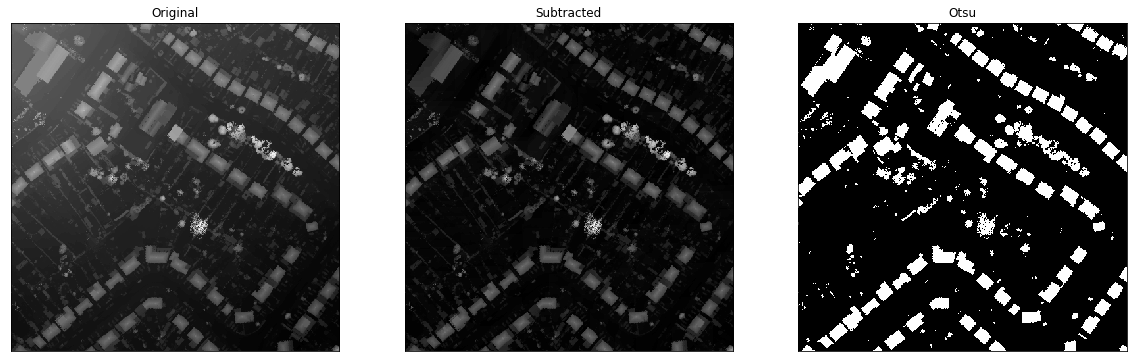

In [64]:
# Subtract DTM from DSM
res = cv2.subtract(img, erosion)

# Otsu binarisation
ret, otsu = cv2.threshold(res,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plot_images([img, res, otsu], 
            ['Original', 'Subtracted', 'Otsu'], 
            (20,20), 
            (1, 3))

### Extras...

### Contours

Until now we have been carrying out segmentation of images but have not had any real way of handling the segmented pixels. The easiest way to handle an extracted feature is to find the contours of the image. Contours are just a curve that connects continous points along a given boundary. To accurately find contours in OpenCV we need to first convert the image into a binary image. This can be achieved using the techniques discussed above (i.e. thresholding, edge detection and morphological filters). By using these tools we create a white feature of interest on a black background, if this is achieved contours can be easily drawn along these boundaries (preferrably white objects on black background). OpenCV returns countours in a list of coordinates that describe the shape of the contour it represents. If the contour is large the list will be large. To reduce this a contour approximation method can be used which only stores the important points (i.e. direction edges). If the contour is a very complicated shape this list may still be very long. This is very common when the contour line is derived from an edge detector and is very noisy. To correct for this we can apply a contour approximation which fits the contour to a similar (and more simple) shape (see the **Douglas-Peucker** algorithm for more information).

Let's take a look at how we can extract the contours for all the above-ground objects we just created, and draw them back onto the original image.

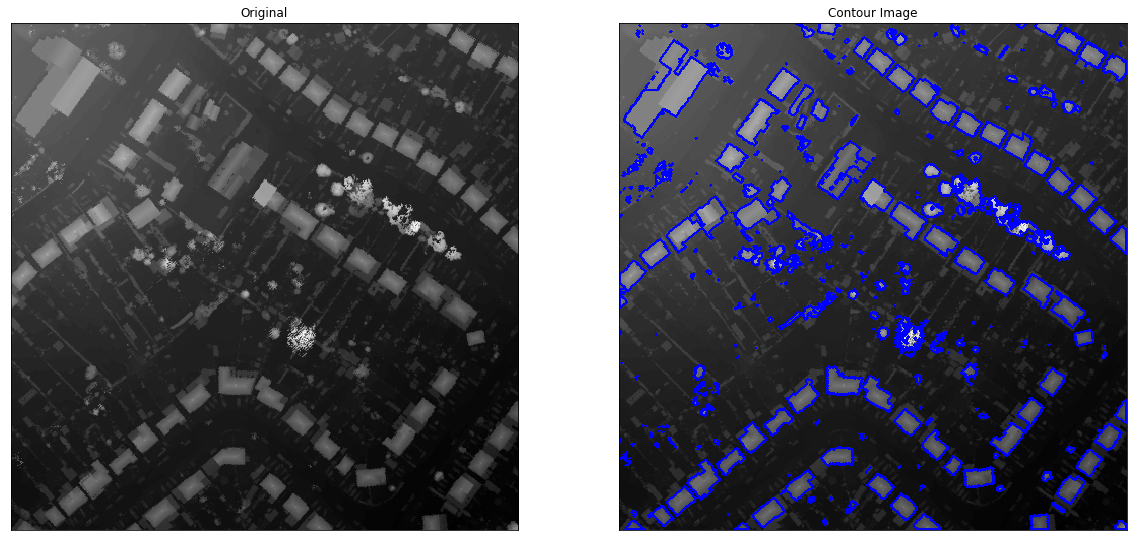

In [65]:
# Find contours
image, contours, hierarchy = cv2.findContours(otsu, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# Draw contours onto image
original_img = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
img = cv2.drawContours(img, contours, -1, (0, 0, 255), 3)

plot_images([original_img, cont_img], ['Original', 'Contour Image'], (20,20), (1,2))